# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdução

Filtros FIR (Finite Impulse Response) são amplamente utilizados devido à sua estabilidade e fase linear. Neste trabalho, projetamos um filtro FIR passa-baixa usando o método da janela de Kaiser, garantindo:

- Atenuação na banda rejeitada ≥ 50 dB
- Frequência de corte: ωc = π/2
- Região de transição: Δω < 0,1π

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transformações.

## Filtro FIR Passa-Baixa

O filtro será projetado pelo método da janela, usando a janela de Kaiser, que permite controlar a transição e atenuação com o parâmetro β.

### Cálculo do Parâmetro β

O valor de β depende da atenuação desejada:

In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = signal.kaiser_beta(atenuacao_desejada)

print(f"Parâmetro β calculado: {beta}")

Parâmetro β calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de β calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o código para projetar o filtro e plotar sua resposta em frequência.

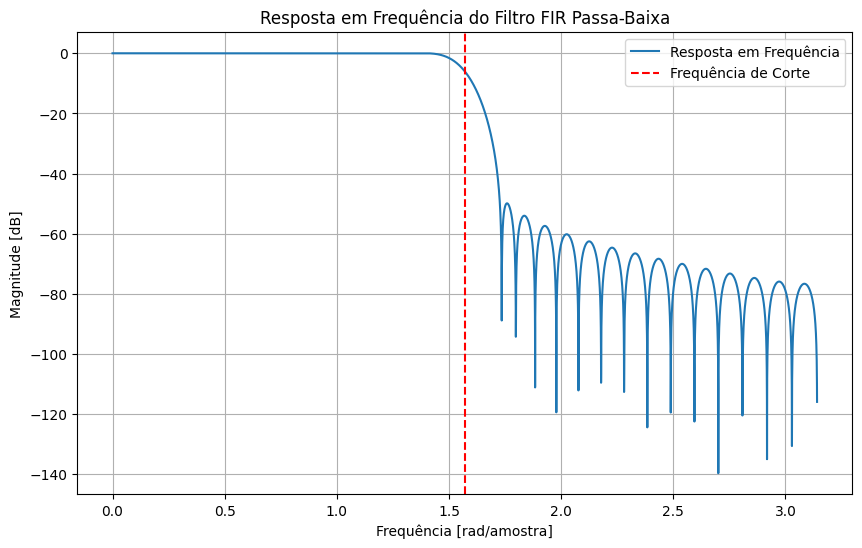

In [13]:
# Projeto do filtro FIR passa-baixa usando a janela de Kaiser
# A função kaiserord retorna uma tupla: (numtaps, beta)
params = signal.kaiserord(atenuacao_desejada, largura_transicao / np.pi)
numtaps = params[0]  # Extrai o número de coeficientes do filtro

# Projeta o filtro FIR
taps = signal.firwin(numtaps, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Resposta em frequência do filtro
frequencias, resposta = signal.freqz(taps, worN=8000)

# Plot da resposta em frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencias, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequência')
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()